# Finding The Motion Envelope For a Rotary Stewart Platform

This notebook explores some simple loops to determine the following for a platform with particular dimensions:
* The middle height and Z limits
* The roll, pitch, and yaw limits
* The x and y motion limits

This notebook stays "clean" by referencing another python file in this directory called motionbase.py which contains a motion base "class," which contains the base's properties and all of the functions needed to simulate it.

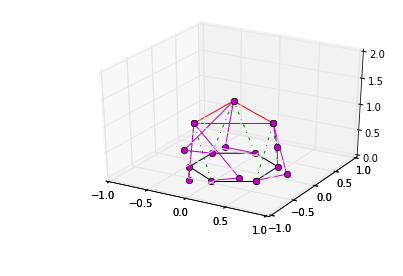

In [9]:
%matplotlib inline
from numpy import *
from motionbase import MotionBase #I put all of the utility functions into one python file. This lets us access ALL of them.

platform_z0 = 1#meters, the resting height of the base.

baseradius = .5 #meters, the radius of the base
motorarm = 0.4 #meters, length of the motor arm
conrod = sqrt(platform_z0**2+motorarm**2)-.05 #meters, length of the connecting rod
platform_radius = .5#meters, the radius of the platform

#create a motion base "object" with our prescribed properties
base = MotionBase(platform_z0,baseradius,platform_radius,motorarm,conrod)

#get our position command for the platform
x,y,z,roll,pitch,yaw = 0,0,0,0,0,0
base.plotbot(x,y,z,roll,pitch,yaw)

(200,)
0.0150753768844 0.386934673367
1


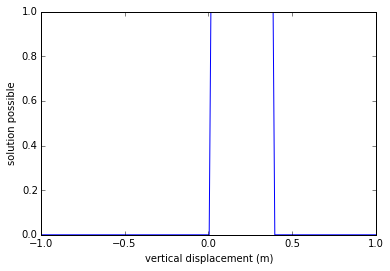

In [10]:
#let's test what height range we have with this current setup.
#we have platform_z0 already. but let's look at a range of perturbations, and then we'll reset z0.

z_vector = linspace(-1,1,200)
successes = zeros(len(z_vector))
print successes.shape
for ind in range(0,len(z_vector)):
    motor_thetas,success = base.findthetam(0,0,z_vector[ind],0,0,0,.001)
    successes[ind]=success


plot(z_vector,successes)
xlabel('vertical displacement (m)')
ylabel('solution possible')

#now pull out the valid indices
valid_indices = where(successes==1)
valid_heights = z_vector[valid_indices]
print valid_heights[0],valid_heights[-1]
#now grab the middle position and reset nominal height to this.
mid_height = (valid_heights[-1]-valid_heights[0])/2
#reset platform resting position
base.platform_z0 = mid_height+base.platform_z0
print platform_z0

0.0 61.7868426345


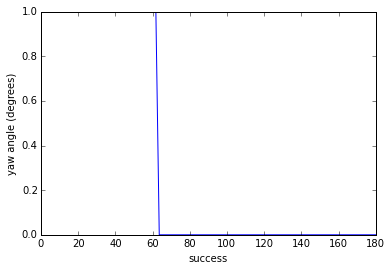

In [12]:
#now the idea is to find out how much yaw we can do at some height. We will start with the mid height, which we just set in the last block!!

yaw_vector = linspace(0,3.14,100)#vector of yaw angles to test

successes = zeros(len(yaw_vector))

for ind in range(0,len(yaw_vector)):
    motor_thetas,success = base.findthetam(0,0,0,0,0,yaw_vector[ind],.001)
    successes[ind] = success

plot(yaw_vector*180/pi,successes)
xlabel('success')
ylabel('yaw angle (degrees)')

#now pull out the valid indices
valid_indices = where(successes==1)
valid_yaws = 180/pi*yaw_vector[valid_indices]
print valid_yaws[0],valid_yaws[-1]

0.0 20.4441758717


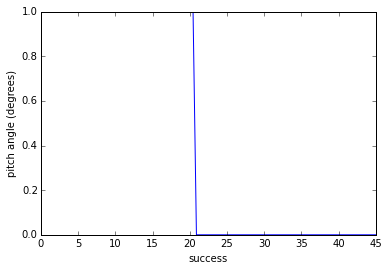

In [17]:
#same thing with pitch
pitch_vector = linspace(0,3.14/4,100)#vector of yaw angles to test

successes = zeros(len(pitch_vector))

for ind in range(0,len(pitch_vector)):
    motor_thetas,success = base.findthetam(0,0,0,0,pitch_vector[ind],0,.001)
    successes[ind] = success

plot(pitch_vector*180/pi,successes)
xlabel('success')
ylabel('pitch angle (degrees)')

#now pull out the valid indices
valid_indices = where(successes==1)
valid_pitch = 180/pi*pitch_vector[valid_indices]
print valid_pitch[0],valid_pitch[-1]

0.0 24.5330110461


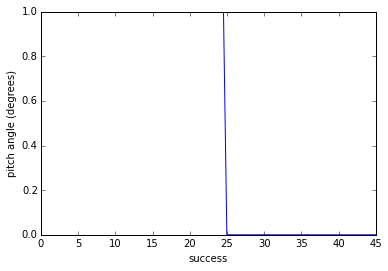

In [18]:
#same thing with pitch
roll_vector = linspace(0,3.14/4,100)#vector of yaw angles to test

successes = zeros(len(pitch_vector))

for ind in range(0,len(roll_vector)):
    motor_thetas,success = base.findthetam(0,0,0,roll_vector[ind],0,0,.001)
    successes[ind] = success

plot(roll_vector*180/pi,successes)
xlabel('success')
ylabel('pitch angle (degrees)')

#now pull out the valid indices
valid_indices = where(successes==1)
valid_roll = 180/pi*roll_vector[valid_indices]
print valid_roll[0],valid_roll[-1]

0.0 0.449494949495


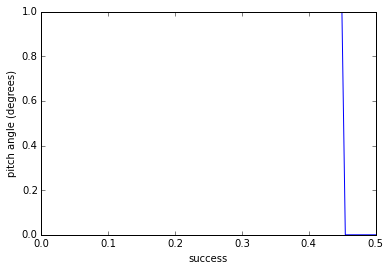

In [23]:
#same thing with y
y_vector = linspace(0,.5,100)#vector of y

successes = zeros(len(y_vector))

for ind in range(0,len(y_vector)):
    motor_thetas,success = base.findthetam(0,y_vector[ind],0,0,0,0,.001)
    successes[ind] = success

plot(y_vector,successes)
xlabel('success')
ylabel('pitch angle (degrees)')

#now pull out the valid indices
valid_indices = where(successes==1)
valid_y = y_vector[valid_indices]
print valid_y[0],valid_y[-1]

0.0 0.449494949495


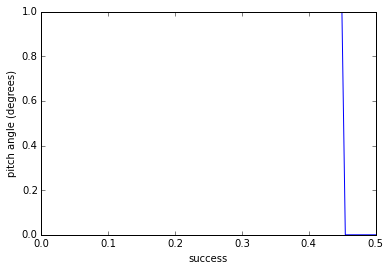

In [24]:
#same thing with x
x_vector = linspace(0,.5,100)#vector of y

successes = zeros(len(x_vector))

for ind in range(0,len(x_vector)):
    motor_thetas,success = base.findthetam(x_vector[ind],0,0,0,0,0,.001)
    successes[ind] = success

plot(x_vector,successes)
xlabel('success')
ylabel('pitch angle (degrees)')

#now pull out the valid indices
valid_indices = where(successes==1)
valid_x = x_vector[valid_indices]
print valid_x[0],valid_x[-1]